## This project involves performing an exploratory data analysis (EDA) on a real-world dataset matches.csv. The goal is to apply statistical inference methods to draw meaningful insights from the data. The project leverages Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for data visualization, and SciPy for statistical tests. 

 ##   Description about dataset
 The dataset used in this project is about the IPL matches. The dataset is stored in a dataframe 'df' . Dataframe has 18 columns and 636 rows. The variables are 
1. id                  - The unique identifier
2. season              - The year of match palyed.
3. city                - name of the city where match occurs.
4. date                - Date of the match 
5. team1               - name of the first team 
6. team2               - name of the second team 
7. toss_winner         - name of toss winning team- 
8. toss_decision       - decision of toss_winner to bat or field. 
9. result              - the outcome of the match   
10. dl_applied         - it shows if the Duckworth-Lewis method was applied or not   
11. winner             - Name of the winning team   
12. win_by_runs        - number of runs by winning team.   
13. win_by_wickets     - number of wickets by running team   
14. player_of_match    - name of the person who won player of match  
15. venue              - the venue of the stadium where match occurs.  
16. umpire1            - Name of first umpire         
17. umpire2            - Name of second umpire   
18. umpire3            - Name of third umpire       

The umpire3 has no values thus it is removed.

Out of which id,season, dl_applied , win_by_runs , win_by_wickets is integer datatype, all other are object datatype.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

Reading the csv file 'matchesML.csv' into dataframe object 'df' and printing the first five records

In [42]:
df = pd.read_csv("matchesML.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [43]:
print(df['season'].value_counts())

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64


In [44]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [45]:
df['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [46]:
# To get dimensions of dataframe
df.shape


(636, 18)

to get the description of the dataframe

In [47]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [48]:
# here given date column has object datatype, so converting it into datetime
df['date'] = pd.to_datetime(df['date'])

# there is no values provided in umpire3 col, so dropping it
df.drop('umpire3', axis=1, inplace=True)


In [49]:
df.describe()

,id,season,date,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,2012-10-24 20:52:04.528302080,0.025157,13.682390,3.372642
min,1.000000,2008.000000,2008-04-18 00:00:00,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,2010-04-11 00:00:00,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,2012-05-21 00:00:00,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,2015-04-22 00:00:00,0.000000,20.000000,7.000000
max,636.000000,2017.000000,2017-05-21 00:00:00,1.000000,146.000000,10.000000
std,183.741666,2.773026,NaN,0.156726,23.908877,3.420338


In [50]:
# finding out missing values
df.isnull().sum()


id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [51]:
# got null values for city, winner,player_of_match,umpire1, umpire2, umpire3
df['city'].fillna('Not Available', inplace=True)
df['winner'].fillna('Not Available', inplace=True)
df['player_of_match'].fillna('Not Available', inplace=True)
df['win_by_runs'].fillna(df['win_by_runs'].mean())

df['umpire1'].fillna('Not Available', inplace=True)
df['umpire2'].fillna('Not Available', inplace=True)

In [52]:
# Rechecking the null values to confirm
#df.isnull().sum()
#df['win_by_runs'].isnull().sum()
df['winner'].isnull().sum()


0

In [53]:
df.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [54]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicate values found:")
    print(duplicates)
else:
    print("No duplicate values found.")


No duplicate values found.


In [55]:
df['dl_applied'].unique()  # showing dl applied method is applied in matched or not

array([0, 1], dtype=int64)

In [56]:
df['win_by_runs'].unique()

array([ 35,   0,  15,  97,  17,  51,  27,   5,  21,  14,  26,  82,   3,
        61,  48,  19,  12, 146,   7,   9,  10,  20,   1, 140,  33,   6,
        66,  13,  45,  29,  18,  23,  41,  65,  25, 105,  75,  92,  11,
        24,  38,   8,  78,  16,  53,   2,   4,  31,  55,  98,  34,  36,
        39,  40,  67,  63,  37,  57,  22,  85,  32,  76, 111,  43,  58,
        28,  74,  42,  59,  46,  47,  86,  44,  87, 130,  60,  77,  30,
        50,  93,  72,  62, 138,  71, 144,  80], dtype=int64)

In [57]:
df['win_by_wickets'].unique()

array([ 0,  7, 10,  6,  9,  4,  8,  5,  2,  3,  1], dtype=int64)

In [58]:
df['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Not Available', 'Rising Pune Supergiants'],
      dtype=object)

I am considering 'win_by_runs' and 'win_by_wickets' as the key variables for analysis , since those are numericals and contains good amount of data that could help in analysing data.

Finding outliers from win_by_runs and win_by_wickets columns to ensure proper analysis and statistical inference.  Box plot is chosen for outlier detection , since they are commonly used for outlier detection. Boz plot divides data into Q1, Q2 or median,Q3. The IQR is formed by the range between Q1 and Q3 which provide insights on the majority data. Thus helping to find the outliers.

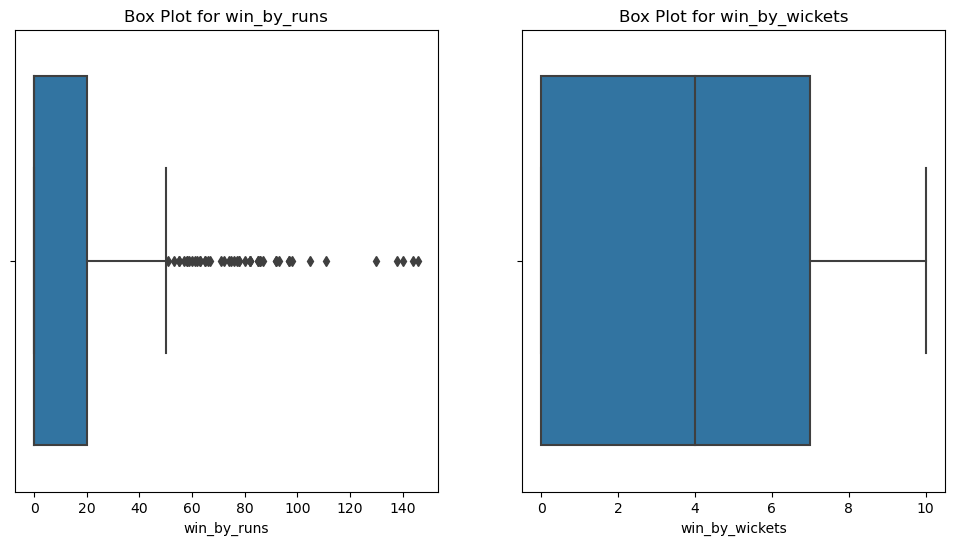

In [59]:
# detecting outlier using box plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='win_by_runs', data=df)
plt.title('Box Plot for win_by_runs')

plt.subplot(1, 2, 2)
sns.boxplot(x='win_by_wickets', data=df)
plt.title('Box Plot for win_by_wickets')

plt.show()

There is outliers detected for win_by_runs variable, thus it is required to remove outliers because it could affect the statistical analysis. Here I am using the qunatile method to remove outliers and displaying the boxplot of win_by_runs column without outliers.

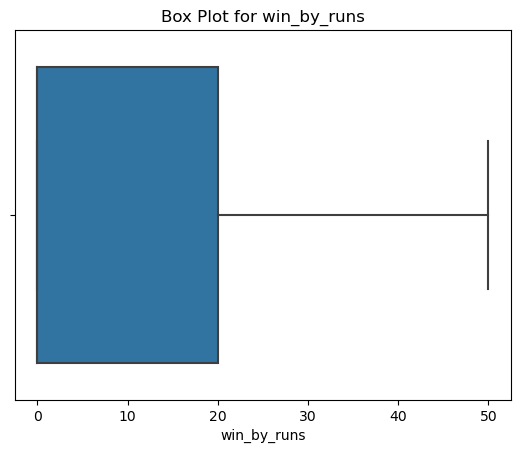

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = df['win_by_runs'].quantile(0.25)
Q3 = df['win_by_runs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['win_by_runs'] >= lower_bound) & (df['win_by_runs'] <= upper_bound)]

sns.boxplot(x='win_by_runs', data=df, sym='', showfliers=False)
plt.title('Box Plot for win_by_runs')

plt.show()



## Exploratory Data Analysis

EDA is performed on the selected columns season,win_by_wickets and win_by_runs to retrieve meaningful insights from them.

Distribution of key variables using histograms.

In [61]:
df['win_by_runs'].value_counts()

win_by_runs
0      349
23       9
10       9
9        9
7        9
      ... 
67       1
57       1
76       1
111      1
80       1
Name: count, Length: 86, dtype: int64

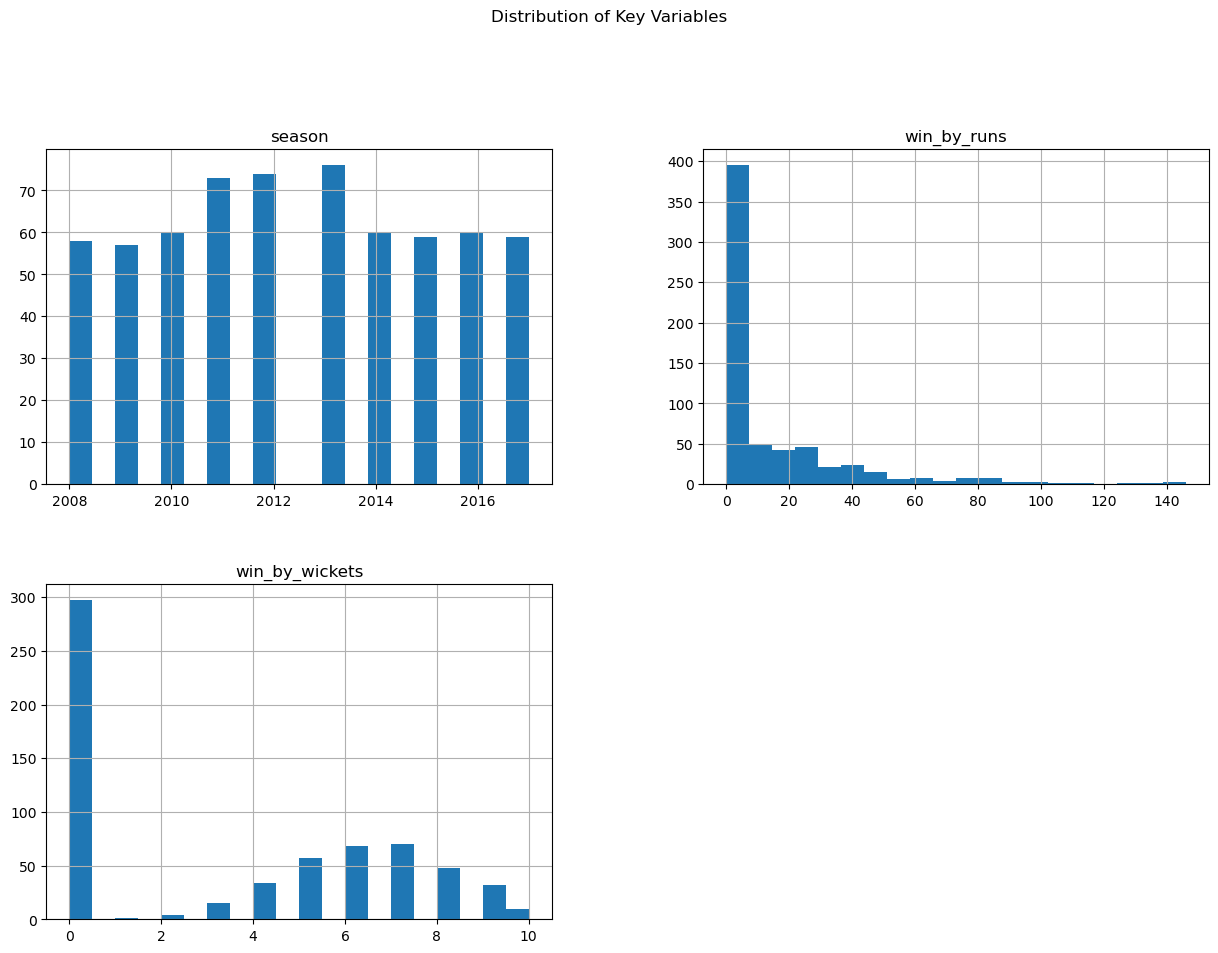

In [62]:
key_col = ['season', 'win_by_runs', 'win_by_wickets']
df[key_col].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Key Variables", y=1.02)
plt.show()

Histogram for season , and  is displayed above. There are few inferences that can be drawn from them. 

'seasons' - 2013 is the season with most number of matches, and the least with 2009. It displays the matches per season.

'win_by_wickets' -  About 250 matches were won by the first batting team. This alone consitute around fifty percent of the total matches. The other wins diplayed are the winnig rate of the fielding teams.

'win_by_runs' - For around 350 matches for 'win_by_runs' are won is 0, which indicates the number of matches that the first fielding team has won the match by wickets.  The other values are the run rate of the fielding teams.

Histograms for win_by_wickets  and win_by_runs are right skewed.

C:\Users\Namitha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


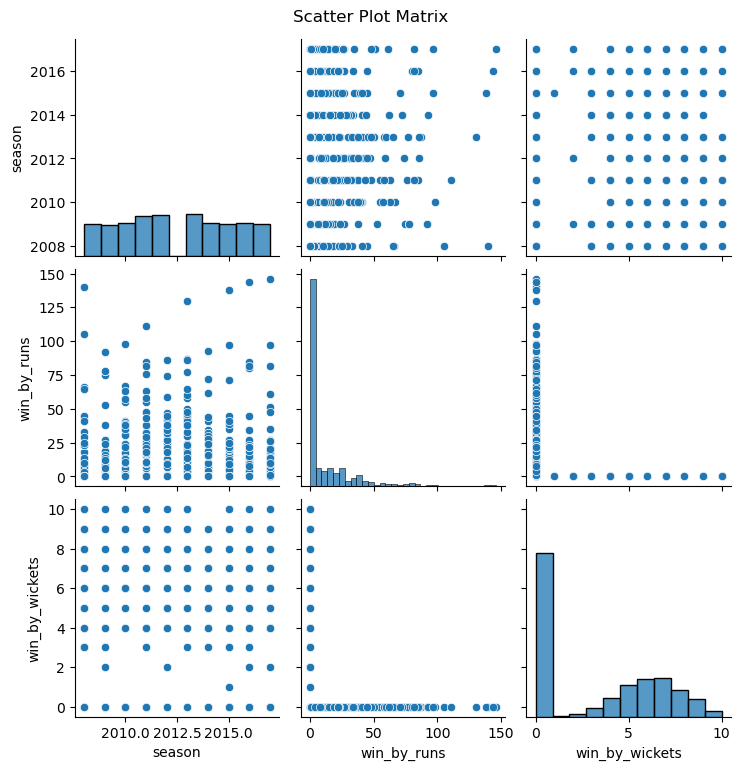

In [63]:

sns.pairplot(df[key_col])
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

The scatter plot shows relationship between the selected key columns - season, win_by_runs, win_by_wickets . 
There is no specific relationship between seasons with win_by_runs and win_by_wickets. 
The win_by_wickets and win_by_runs shows a weak relation with most datapoints arount zero, shows the team who win by wickets have no chance of winning by runs.  

Correlation matrix heatmap for demonstrating relationship between key variables

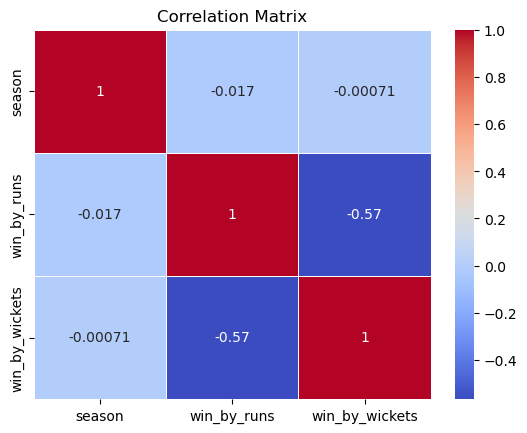

In [65]:
# Correlation matrix heatmap
correlation_matrix = df[key_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

The negative corelation between win_by_runs and win_by_wickets shows that when one team win_by_runs, other teams loses by small number of wickets and vice versa.
The weak corelation between season to win_by_runs and win_by_wickects indicates that the success of team is not realted to the seasons.

Comparisons using Box plot for 'season' vs 'win_by_runs'

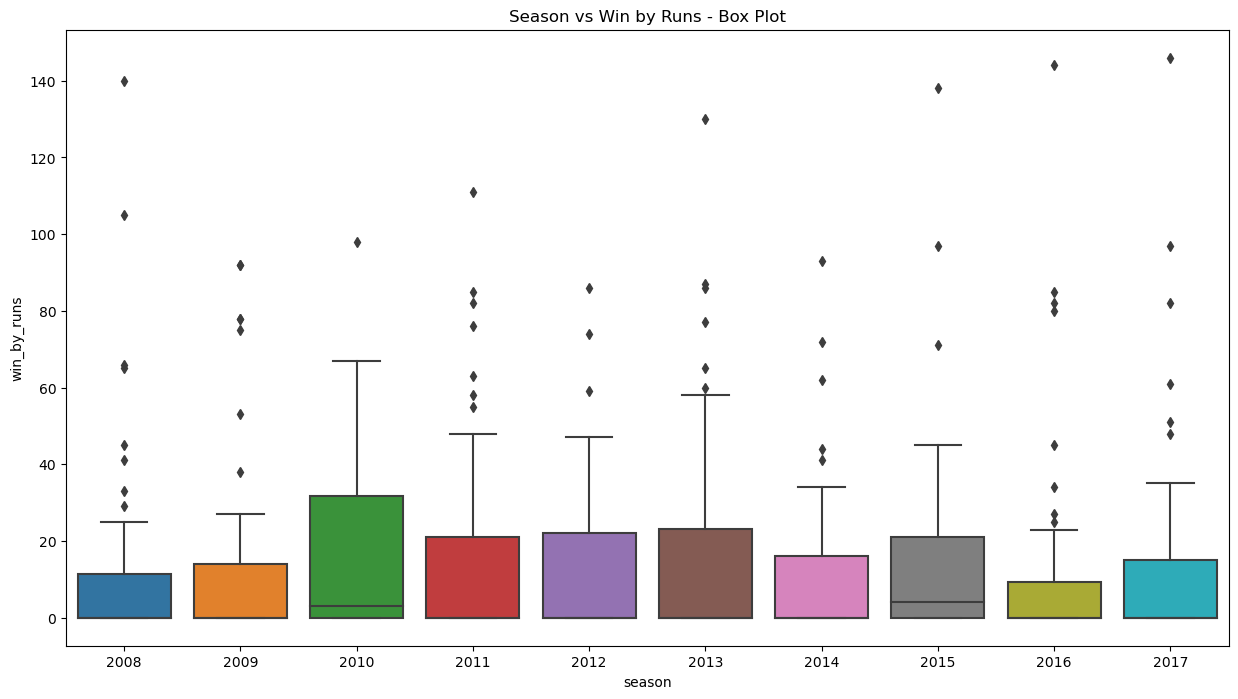

In [66]:

plt.figure(figsize=(15, 8))
sns.boxplot(x='season', y='win_by_runs', data=df)
plt.title("Season vs Win by Runs - Box Plot")
plt.show()

The box plot shows the win_by_runs over the years from 2008 to 2017. 
while checking IQR, for example, in year 2011 IQR shows around 20 win_by_runs. It indicates that 50 percent of matches played in 2012 is won by 20 runs.
The plot also indicates the outliers, which are data indicated above the whiskers.

Bar chart for the number of wins by each team

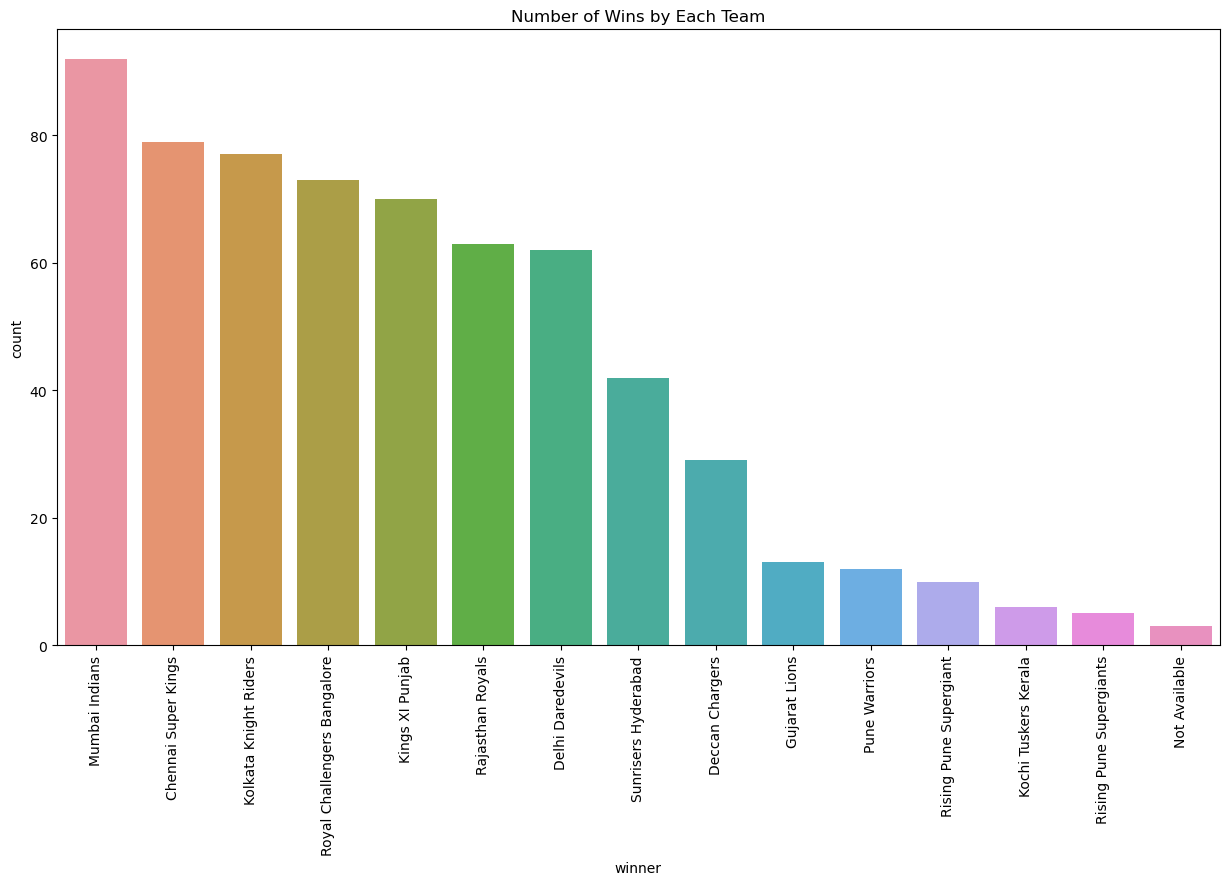

In [67]:

plt.figure(figsize=(15, 8))
sns.countplot(x='winner', data=df, order=df['winner'].value_counts().index)
plt.title("Number of Wins by Each Team")
plt.xticks(rotation=90)
plt.show()


The above barchart illustrates the number of times each team won over the years. Mumbai Indians more than 90 matches and is the hightest count.  Rising Pune Supergaints won the least with less than 10 matches.

## Statistical Inference

1. Formulate one or two hypotheses based on the EDA findings.

1. The possibility of win or lose of match is not dependent on the season.
2. The win_by_wickets and win_by_runs shows a weak relationship, it shows the team who win by wickets have no chance of winning by runs.
3. When one team wins the match by runs, other teams loses by small number of wickets and vice versa.
4. Year 2013 is the season with most number of matches, and 2009 has the least.
3. The toss decision doesnot affect the match result.

2. Use SciPy (or anything else you wish) to conduct appropriate statistical analysis. You could explore SciPy t-tests, chi-square tests, etc.

In [68]:
# Import necessary libraries
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['toss_decision'], df['result'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')



Chi-Square Statistic: 0.11321558128744547
P-value: 0.944964620660505


Interpretation of Result

Chi-square value obtained is 0.11321558128744547, which is greater than 0.05. It indicates there is strong relationship between the variables.
P-value is more than 0.05, by which the null hypothesis cannot be rejected.

## Visualization and Presentation of Findings

Create visualizations to present the findings from the EDA and statistical tests.

Visualization based on EDA is already provided above under EDA part.


Representation based on statistical findings

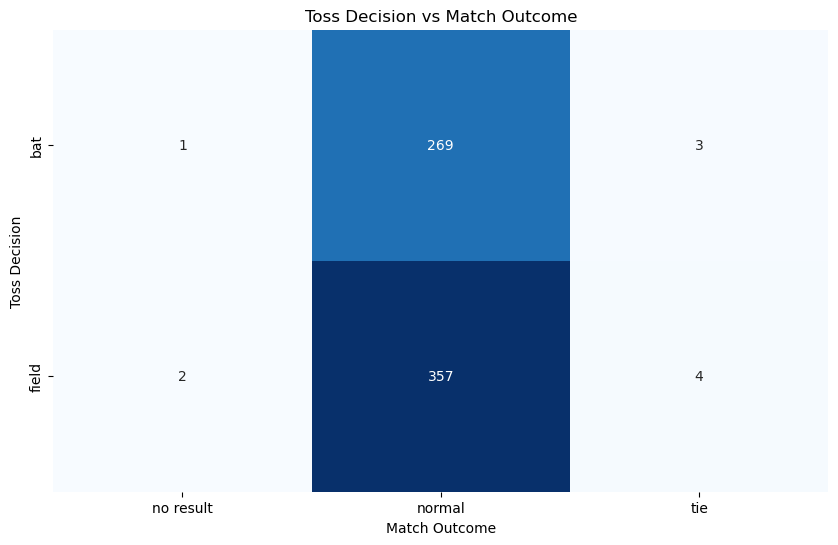

In [69]:

contingency_table = pd.crosstab(df['toss_decision'], df['result'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False)
#sns.heatmap(contingency_table, annot=True, cmap="Blues")

plt.title("Toss Decision vs Match Outcome")
plt.xlabel("Match Outcome")
plt.ylabel("Toss Decision")
plt.show()


From the outcome, it is evident that there no significance of toss decision on the winning probability. 

## Report

    
Report on IPL matches dataset
Project overview:
The project deals with analyzing the dataset of IPL matches. The dataset with 636 rows and 18 columns is kept in a dataframe df.  The variables of dataset are listed :

1.	id - The unique identifier.

2.	season - The year of match palyed.

3.	city - name of the city where match occurs.

4.	date - Date of the match.

5.	team1 - name of the first team.

6.	team2 - name of the second team.

7.	toss_winner - name of toss winning team.

8.	toss_decision - decision of toss_winner to bat or field.

9.	result - the outcome of the match.

10.	dl_applied - it shows if the Duckworth-Lewis method was applied or not.

11.	winner - Name of the winning team.

12.	win_by_runs - number of runs by winning team.

13.	win_by_wickets - number of wickets by running team.

14.	player_of_match - name of the person who won player of match.

15.	venue - the venue of the stadium where match occurs.

16.	umpire1 - Name of first umpire.

17.	umpire2 - Name of second umpire.

18.	umpire3 - Name of third umpire.

The following columns have integer data type are  id, season, dl_applied, win_by_runs,  win_by_wickets. All other have string datatype.

Data Cleaning and Preprocessing
•	The dataset is loaded into dataframe df and transformed in a way making them fit for analysis.

•	The datatypes of all columns are ensured to be appropriate . The date column in object dataype is converted to datetime.

•	All missing values were handled.

•	Missing values in  'city, 'winner,  'player_of_match, 'umpire1, 'umpire2' columns are filled appropriately.

•	'umpire3 colum is removed as it had all null values

•	Outliers were detected using box plot and is removed using quantile method.

Descriptive statistics: 

The DataFrame's descriptive statistics reveal information about the central tendency and dispersion of numerical columns ('id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets'). Additionally, information about the data types and memory usage is obtained using the info() method.

Exploratory Data Analysis 

•	Box plot for outlier detection:  Box plot is used to detect outliers in win_by_runs and win_by_wickets colums . Outliers are detected in win_by_runs.

•	Histograms:  Histogram is used to show the data distribution in season,  win_by_runs and win_by_wickets columns.

•	Scatter plot matrix: It was used to find out the relationship between season,  win_by_runs and win_by_wickets.

•	Correlation matrix heatmap: Heatmap was used to find out relation between season,  win_by_runs and win_by_wickets. A weak correlation was observed.

•	Box plot : Box plot was used to see relation of  'season' vs 'win_by_runs' over the years.

•	Bar chart: Used to find out the teams winning over the years, and found out the most winners over the years and the least winning team.

 
Statistical Inference 

A chi-squared test is done to evaluate relation between toss_decision and result. From the result there was no significant relationship among the variables and hypothesis were made accordingly.


Visualization and Presentation of Findings 
 All the charts of EDA and the the heatmap of tossdecision and result visualizes the findings.
 
Hypothesis reached :

1. The possibility of win or lose of match is not dependent on the season.

2. The win_by_wickets and win_by_runs shows a weak relationship, it shows the team who win by wickets have no chance of winning by runs.

3. When one team wins the match by runs, other teams loses by small number of wickets and vice versa.

4. Year 2013 is the season with most number of matches, and 2009 has the least.

5. The toss decision doesnot affect the match result.

## Reflection

Challenges encountered

•	Finding an appropriate dataset.

•	Data cleaning and handling missing values: There were many missing values, inappropriate datatypes, and outlers to be fixed in the dataset.

•	Outlier detection: Outliers are detected in the win_by_runs column , which is solved by quantile method.

•	Recognizing the relationship amoung relevant variables required several methods and visualization.



Further questions for exploration or analysis:

•	Team performance analysis: To anayse the performance of each team over the years and to predict the next winning team based on their previous performances.

•	Effect of venue on match result : Investigate on how different match locations affect the result and whether it favours each team or not.

•	Social media sentiment analysis:  Integrate social media data to analyse the public expectations and reactions before and after the match.
	